# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 2

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

* Задача 1 &mdash;  80 баллов
* Задача 2 &mdash;  30 баллов




-----

In [2]:
# Bot check

# HW_ID: phds_hw2
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

## Сверточные сети

В этой домашней работе вам предстоит построить сверточную сеть для классификации изображений.

#### Биология
Необходимо классифицировать изображения МРТ головного мозга из датасета [**"Brain Tumor Classification (MRI)"**](https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri) и определить вид опухоли.

#### Физика
Необходимо классифицировать изображения солнечного затмения из датасета [**"Solar Eclipse Classification"**](https://www.kaggle.com/datasets/tshr147/solar-eclipse-classification) по степени: частичное, полное и кольцевое.

### Задача 1.

**Пожалуйста, ПРОЧИТАЙТЕ ВНИМАТЕЛЬНО то, что написано ниже, там изложены требования к вашей работе и полезные советы!**


**Требование к работе**

* **Запрещено** использовать предобученные нейросети.

* **Запрещено** использовать тестовые данные где-либо за исключением вычисления финальной оценки качества. Подсказка &mdash; распределение данных на тесте такое же как в тестовых данных.


### Советы

#### Архитектура нейросети
* В отличие от семинара в данном датасете могут встретиться картинки разных размеров. Эту проблему можно решить двумя способами:
  - Используя `torchvision.transforms.Resize` можно привести картинки к единому размеру. Если вы решите использовать этот способ, стоит посмотреть, какого в принципе размера встречаются картинки, чтобы не сжать их слишком сильно. Для картинок одного размера можно обучить бейзлайн в виде полносвязной сети.
  - Учесть переменный размер картинки в архитектуре сети. Общий принцип здесь такой: можно использовать свертки с нужным `padding`, чтобы не иметь проблем из-за уменьшения размеров картинки из-за сверток, последовательно применяя сверточные слои и пуллинги, нужно увеличивать количество каналов одновременно с уменьшением размера картинок (из-за пуллинга), а в конце, получив картинку размера (n_channels, nx, ny), оставить вектор размера (n_channels) (n_channels будет одинаковым для всех картинок, поскольку зависит от архитектуры сети!). Сделать это можно усреднением по пространственным картам [torch.nn.AdaptiveAvgPool2d](https://pytorch.org/docs/stable/generated/torch.nn.AdaptiveAvgPool2d.html).
* Попробуйте разные размеры фильтров, страйдинг, паддинг
* Также можно попробовать разные активации: `tanh`, `leaky relu` и другие.

#### Процесс обучения
* Воспользуйтесь GPU google colab или любой другой GPU, которая у вас есть.
* Для сокращения вычислительной сложности можно поэксперементировать с параметром `stride`. Кроме того можете попробовать разные виды Poooling-ов.
* Помните, что некоторым нейросетям требуется $10$ эпох, чтобы сойтись, а некоторым – $500$. Большие нейросети дольше обучаются.
* Если вы достигли какого-то порога на валидации лучше подождать примерно 10 эпох перед тем как останавливать обучение.

#### И главное:
* Рисуйте кривые обучения: loss и метрика качества (лучше использовать F1-меру) для обучения и валидации.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil

import torch
from torch import nn
import torchvision
from torchvision import transforms
from sklearn.metrics import f1_score
from sklearn.utils.random import sample_without_replacement
from IPython.display import Image, clear_output
from collections import defaultdict
from torch.optim import lr_scheduler
from matplotlib.animation import FuncAnimation, ImageMagickFileWriter
import time

%matplotlib inline

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"
# device = "cpu"
print(device)

cpu


### Для Google Colab
Чтобы не грузить данные каждый раз в колаб при его отключении, а данные сюда грузятся небыстро, будет лучше всего поступить следующим образом.
* Загрузите архив на диск.
* Примонтируйте ваш диск к данному ноутбуку с помощью кода ниже


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


* В панели слева ("Файлы") откройте папку `drive/MyDrive/..` и найдите архив с файлом на диске
* Кликните по файлу и нажмите на кнопку "Скопировать путь"

Теперь вы можете обратиться к данным, используя скопированный путь

In [6]:
# Путь до диска (для напоминания)
DISK_PATH = "drive/MyDrive"
# Путь до архива с данными (пример)
ZIP_PATH = "/content/drive/MyDrive/archive.zip"
# Путь для папки с данными
DATA_PATH = "/content"

* Разархивируйете данные на диске.

In [7]:
! unzip $ZIP_PATH -d  $DATA_PATH;

Archive:  /content/drive/MyDrive/archive.zip
  inflating: /content/Test/Annular_solar_eclipse/Augmented_0__0_7711.jpeg  
  inflating: /content/Test/Annular_solar_eclipse/Augmented_0__0_7722.jpeg  
  inflating: /content/Test/Annular_solar_eclipse/Augmented_0__0_7748.jpeg  
  inflating: /content/Test/Annular_solar_eclipse/Augmented_0__0_7755.jpeg  
  inflating: /content/Test/Annular_solar_eclipse/Augmented_0__0_7761.jpeg  
  inflating: /content/Test/Annular_solar_eclipse/Augmented_0__0_7775.jpeg  
  inflating: /content/Test/Annular_solar_eclipse/Augmented_0__0_7800.jpeg  
  inflating: /content/Test/Annular_solar_eclipse/Augmented_0__0_7819.jpeg  
  inflating: /content/Test/Annular_solar_eclipse/Augmented_0__0_7825.jpeg  
  inflating: /content/Test/Annular_solar_eclipse/Augmented_0__0_7835.jpeg  
  inflating: /content/Test/Annular_solar_eclipse/Augmented_0__0_7845.jpeg  
  inflating: /content/Test/Annular_solar_eclipse/Augmented_0__0_7849.jpeg  
  inflating: /content/Test/Annular_solar_ec

In [8]:
DATA_PATH = os.path.join(DATA_PATH, '')

В папке `DATA_PATH` теперь хранится папка с тренировочными данными (у биологов - `Training`, у физиков - `Train`) и тестовыми (у биологов - `Testing`, у физиков - `Test`). В папку с тестовыми данными не подглядывать :)

In [9]:
! ls $DATA_PATH

drive  sample_data  Test  Train


### Подготовка датасетов

### Физика
В `train` датасете $3$ вида солнечного затмения и $2214$ изображений Солнца (объектов). Посмотрим на какую-нибудь картину из набора данных.

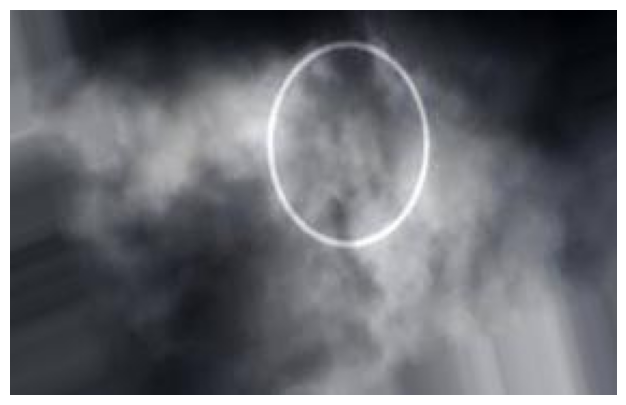

In [10]:
path_to_img = os.path.join(DATA_PATH, "Train/Annular_solar_eclipse/Augmented_0__0_955.jpeg")
image = plt.imread(path_to_img)
plt.figure(figsize=(12, 5))
plt.imshow(image)
plt.axis("off");

In [11]:
from PIL import Image
with Image.open(path_to_img) as img:
    width, height = img.size
print(width, ' ', height)

282   179


In [12]:
from os import listdir

path = os.path.join(DATA_PATH, "Train/Annular_solar_eclipse/")
imagesList = listdir(path)
loadedImages = []

for image in imagesList:
    img = Image.open(path + image)
    loadedImages.append(img)

imgs = loadedImages


In [13]:
for img in imgs:
  print(img.size)

(275, 183)
(225, 225)
(318, 159)
(300, 168)
(369, 137)
(300, 168)
(275, 183)
(275, 183)
(275, 183)
(259, 194)
(300, 168)
(259, 194)
(275, 183)
(275, 183)
(259, 194)
(301, 167)
(259, 194)
(259, 194)
(259, 194)
(282, 179)
(259, 194)
(225, 225)
(225, 225)
(300, 168)
(225, 225)
(275, 183)
(266, 190)
(275, 183)
(282, 179)
(301, 167)
(259, 194)
(259, 194)
(259, 194)
(259, 194)
(300, 168)
(259, 194)
(301, 167)
(318, 159)
(282, 179)
(259, 194)
(275, 183)
(282, 179)
(239, 211)
(259, 194)
(282, 179)
(259, 194)
(300, 168)
(318, 159)
(266, 190)
(275, 183)
(275, 183)
(259, 194)
(300, 168)
(259, 194)
(225, 225)
(275, 183)
(300, 168)
(239, 211)
(275, 183)
(266, 190)
(239, 211)
(259, 194)
(369, 137)
(301, 167)
(369, 137)
(259, 194)
(300, 168)
(369, 137)
(282, 179)
(275, 183)
(275, 183)
(259, 194)
(282, 179)
(300, 168)
(275, 183)
(301, 167)
(275, 183)
(300, 168)
(259, 194)
(300, 168)
(318, 159)
(259, 194)
(225, 225)
(275, 183)
(259, 194)
(275, 183)
(259, 194)
(225, 225)
(259, 194)
(318, 159)
(239, 211)

Размеры и вправду разные :(

Разобьем `train` выборку на `train` и `val`:



In [14]:
# Папка со всеми фотографиями / папка с фотографиями для тренировки
TRAIN_DIR = os.path.join(DATA_PATH, "Train")
# Считываем названия директорий, которые и являются видом затмения
ECLIPSE_LIST = {i:name for i, name in enumerate(os.listdir(TRAIN_DIR))}


# Папка с фотографиями для валидации
VAL_DIR = os.path.join(DATA_PATH, "val")
os.makedirs(VAL_DIR, exist_ok=True)

# Папка с фотографиями для теста
TEST_DIR = os.path.join(DATA_PATH, "Test")


# Доля изображений в валидации
VAL_FRAC = 0.3


# Создаем директорию с валидационной выборкой для каждого вида затмения.
for eclipse in ECLIPSE_LIST.values():
    os.makedirs(os.path.join(VAL_DIR, eclipse), exist_ok=True)

    # Считываем выборку изображений.
    eclipse_path = os.path.join(TRAIN_DIR, eclipse)

    # Сортируем изображения для детерминированнсти
    images_filename = sorted(os.listdir(eclipse_path))

    # Выделяем часть изображений для валидации
    # Выбираем случайные изображения из выборки для валидции, с установленным random_state
    num_images = len(images_filename)
    num_val = int(num_images * VAL_FRAC)
    indices = sample_without_replacement(num_images, num_val, random_state=42)
    val_images = np.take(images_filename, indices)

    print(f'{eclipse} | train images = {num_images - num_val} | val images = {num_val}')

    # Сохраняем валидационную выборку
    for image_filename in val_images:
        source = os.path.join(TRAIN_DIR, eclipse, image_filename)
        destination = os.path.join(VAL_DIR, eclipse, image_filename)
        shutil.copy(source, destination)
        os.remove(source)

Annular_solar_eclipse | train images = 493 | val images = 211
Partial_solar_eclipse | train images = 543 | val images = 232
Total_solar_eclipse | train images = 515 | val images = 220


Убедимся еще раз, что в папке train и val все разложено по папкам-классам (авторам). Эта структура папок важна для использования классов PyTorch по работе с данными (`ImageFolder` и `DataLoader`):

In [15]:
!ls $TRAIN_DIR

Annular_solar_eclipse  Partial_solar_eclipse  Total_solar_eclipse


In [16]:
!ls $VAL_DIR

Annular_solar_eclipse  Partial_solar_eclipse  Total_solar_eclipse


In [17]:
resize_and_crop = transforms.Compose([
   transforms.Resize(size = (200,300)),
   transforms.ToTensor()
])
dataset = torchvision.datasets.ImageFolder(root=TRAIN_DIR, transform=resize_and_crop)

In [18]:
dataset

Dataset ImageFolder
    Number of datapoints: 1551
    Root location: /content/Train
    StandardTransform
Transform: Compose(
               Resize(size=(200, 300), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
           )

In [19]:
train_dataset = torchvision.datasets.ImageFolder(TRAIN_DIR, transform=resize_and_crop)
val_dataset = torchvision.datasets.ImageFolder(VAL_DIR, transform=resize_and_crop)

In [20]:
train_dataset

Dataset ImageFolder
    Number of datapoints: 1551
    Root location: /content/Train
    StandardTransform
Transform: Compose(
               Resize(size=(200, 300), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
           )

### I. Построение сверточных сетей с использованием Dropout и BatchNorm

В первой части задания вам предстоит сравнить четыре различные реализации одной и той же сверточной сети. Для реализации сети можете смело использовать код с семинара.

In [21]:
def plot_learning_curves(history):


    '''
    Функция для вывода лосса и метрики во время обучения.

    :param history: (dict)
        accuracy и loss на обучении и валидации
    '''
    # sns.set_style(style='whitegrid')
    fig = plt.figure(figsize=(20, 7))

    plt.subplot(1,2,1)
    plt.title('Лосс', fontsize=15)
    plt.plot(history['loss']['train'], label='train')
    plt.plot(history['loss']['val'], label='val')
    plt.ylabel('лосс', fontsize=15)
    plt.xlabel('эпоха', fontsize=15)
    plt.legend()

    plt.subplot(1,2,2)
    plt.title('Точность', fontsize=15)
    plt.plot(history['acc']['train'], label='train')
    plt.plot(history['acc']['val'], label='val')
    plt.ylabel('лосс', fontsize=15)
    plt.xlabel('эпоха', fontsize=15)
    plt.legend()
    plt.show()

In [22]:
def train(
    model,
    criterion,
    optimizer,
    train_batch_gen,
    val_batch_gen,
    num_epochs=50
):
    '''
    Функция для обучения модели и вывода лосса и метрики во время обучения.

    :param model: обучаемая модель
    :param criterion: функция потерь
    :param optimizer: метод оптимизации
    :param train_batch_gen: генератор батчей для обучения
    :param val_batch_gen: генератор батчей для валидации
    :param num_epochs: количество эпох

    :return: обученная модель
    :return: (dict) accuracy и loss на обучении и валидации ("история" обучения)
    '''

    history = defaultdict(lambda: defaultdict(list))

    for epoch in range(num_epochs):
        train_loss = 0
        train_acc = 0
        val_loss = 0
        val_acc = 0

        start_time = time.time()

        # Устанавливаем поведение dropout / batch_norm  в обучение
        model.train(True)

        # На каждой "эпохе" делаем полный проход по данным
        for X_batch, y_batch in train_batch_gen:
            # Обучаемся на батче (одна "итерация" обучения нейросети)
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)

            # Логиты на выходе модели
            logits = model(X_batch)

            # Подсчитываем лосс
            loss = criterion(logits, y_batch.long().to(device))

            # Обратный проход
            loss.backward()
            # Шаг градиента
            optimizer.step()
            # Зануляем градиенты
            optimizer.zero_grad()

            # Сохраяняем лоссы и точность на трейне
            train_loss += loss.detach().cpu().numpy()
            y_pred = logits.max(1)[1].detach().cpu().numpy()
            train_acc += np.mean(y_batch.cpu().numpy() == y_pred)

        # Подсчитываем лоссы и сохраням в "историю"
        train_loss /= len(train_batch_gen)
        train_acc /= len(train_batch_gen)
        history['loss']['train'].append(train_loss)
        history['acc']['train'].append(train_acc)

        # Устанавливаем поведение dropout / batch_norm в режим тестирования
        model.train(False)

        # Полный проход по валидации
        for X_batch, y_batch in val_batch_gen:
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)

            # Логиты, полученные моделью
            logits = model(X_batch)

            # Лосс на валидации
            loss = criterion(logits, y_batch.long().to(device))

            # Сохраяняем лоссы и точность на валидации
            val_loss += loss.detach().cpu().numpy()
            y_pred = logits.max(1)[1].detach().cpu().numpy()
            val_acc += np.mean(y_batch.cpu().numpy() == y_pred)

        # Подсчитываем лоссы и сохраням в "историю"
        val_loss /= len(val_batch_gen)
        val_acc /= len(val_batch_gen)
        history['loss']['val'].append(val_loss)
        history['acc']['val'].append(val_acc)

        clear_output()

        plot_learning_curves(history)

    return model, history

In [23]:
batch_size = 64

train_batch_gen = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_batch_gen   = torch.utils.data.DataLoader(val_dataset,   batch_size=batch_size, shuffle=True)

1. Постройте простую сверточную сеть без использования функций Dropout и BatchNorm.

In [61]:
class SimpleConvNet(nn.Module):
    def __init__(self):
        super(SimpleConvNet, self).__init__()

        self.conv1 = nn.Conv2d(3, 16, 4)
        self.mp1 = nn.MaxPool2d(3)

        self.relu1 = nn.ReLU()

        self.conv2 = nn.Conv2d(16, 8, 3)
        self.mp2 = nn.MaxPool2d(2)

        self.relu2 = nn.ReLU()


        self.flatten = nn.Flatten()
        self.fc3 = nn.Linear(11280, 512)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(512, 3)

    def forward(self, x):
        layer1 = self.conv1(self.mp1(x))
        layer1 = self.relu1(layer1)

        layer2 = self.mp2(self.conv2(layer1))
        layer2 = self.relu2(layer2)

        out = self.flatten(layer2)
        out = self.relu3(self.fc3(out))
        out = self.fc4(out)
        return out

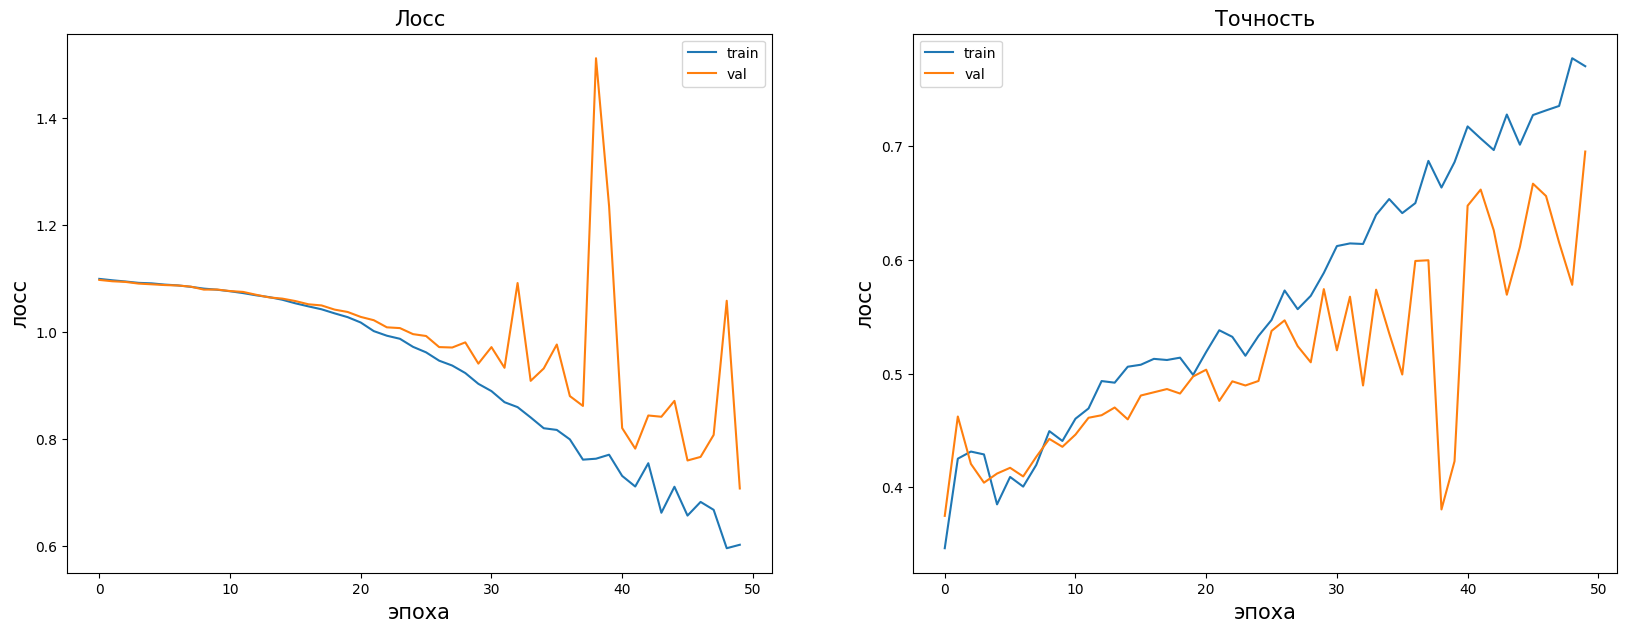

In [62]:
model = SimpleConvNet().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.005)

model, history = train(
    model, criterion, optimizer,
    train_batch_gen, val_batch_gen,
    num_epochs=50
)

Видны скачки loss начиная с ~37 эпохи. Я считаю, что это может быть связано с перескакиванием минимума из-за слишком высокого lr

2. Попробуйте добавить BatchNorm на слои своей сверточной сети, не используя Dropout.

In [78]:
class ConvNetBN(nn.Module):
    def __init__(self):
        super(ConvNetBN, self).__init__()

        self.conv1 = nn.Conv2d(3, 16, 4)
        self.mp1 = nn.MaxPool2d(3)
        self.bn1 = nn.BatchNorm2d(16)

        self.relu1 = nn.ReLU()

        self.conv2 = nn.Conv2d(16, 8, 3)
        self.mp2 = nn.MaxPool2d(2)
        self.bn2 = nn.BatchNorm2d(8)

        self.relu2 = nn.ReLU()


        self.flatten = nn.Flatten()
        self.fc3 = nn.Linear(11280, 512)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(512, 3)

    def forward(self, x):
        layer1 = self.conv1(self.mp1(x))
        layer1 = self.relu1(self.bn1(layer1))

        layer2 = self.mp2(self.conv2(layer1))
        layer2 = self.relu2(self.bn2(layer2))

        out = self.flatten(layer2)
        out = self.relu3(self.fc3(out))
        out = self.fc4(out)
        return out

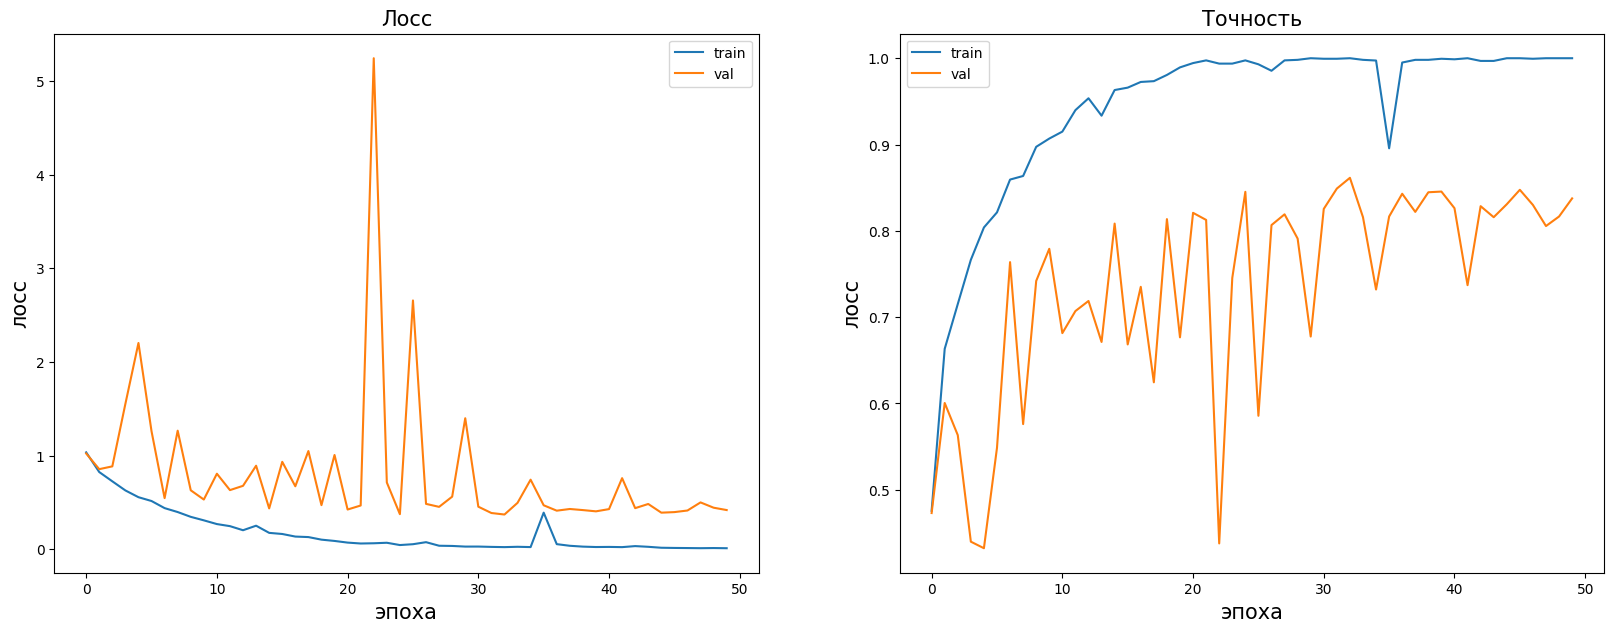

In [79]:
modelBN = ConvNetBN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(modelBN.parameters(), lr=0.01)

modelBN, historyBN = train(
    modelBN, criterion, optimizer,
    train_batch_gen, val_batch_gen,
    num_epochs=50
)

Происходит нечто странное. по точность на трейне практически 1, что свидетельствует о переобучении, но в то же время точность на валидации в пределах нормы(?!)

3. Попробуйте добавить Dropout на слои своей сверточной сети, не используя BatchNorm.

In [80]:
class ConvNetDr(nn.Module):
    def __init__(self):
        super(ConvNetDr, self).__init__()

        self.conv1 = nn.Conv2d(3, 16, 4)
        self.mp1 = nn.MaxPool2d(3)
        self.droupout1 = nn.Dropout(0.3)
        self.relu1 = nn.ReLU()

        self.conv2 = nn.Conv2d(16, 16, 3)
        self.mp2 = nn.MaxPool2d(2)
        self.droupout2 = nn.Dropout(0.3)
        self.relu2 = nn.ReLU()

        self.flatten = nn.Flatten()
        self.fc3 = nn.Linear(23808, 512)
        self.droupout3 = nn.Dropout(0.3)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(512, 3)

    def forward(self, x):
        layer1 = self.mp1(self.conv1(x))
        layer1 = self.relu1(self.droupout1(layer1))

        layer2 = self.mp2(self.conv2(layer1))
        layer2 = self.relu2(self.droupout2(layer2))

        out = self.flatten(layer2)
        out = self.relu3(self.droupout3(self.fc3(out)))
        out = self.fc4(out)
        return out

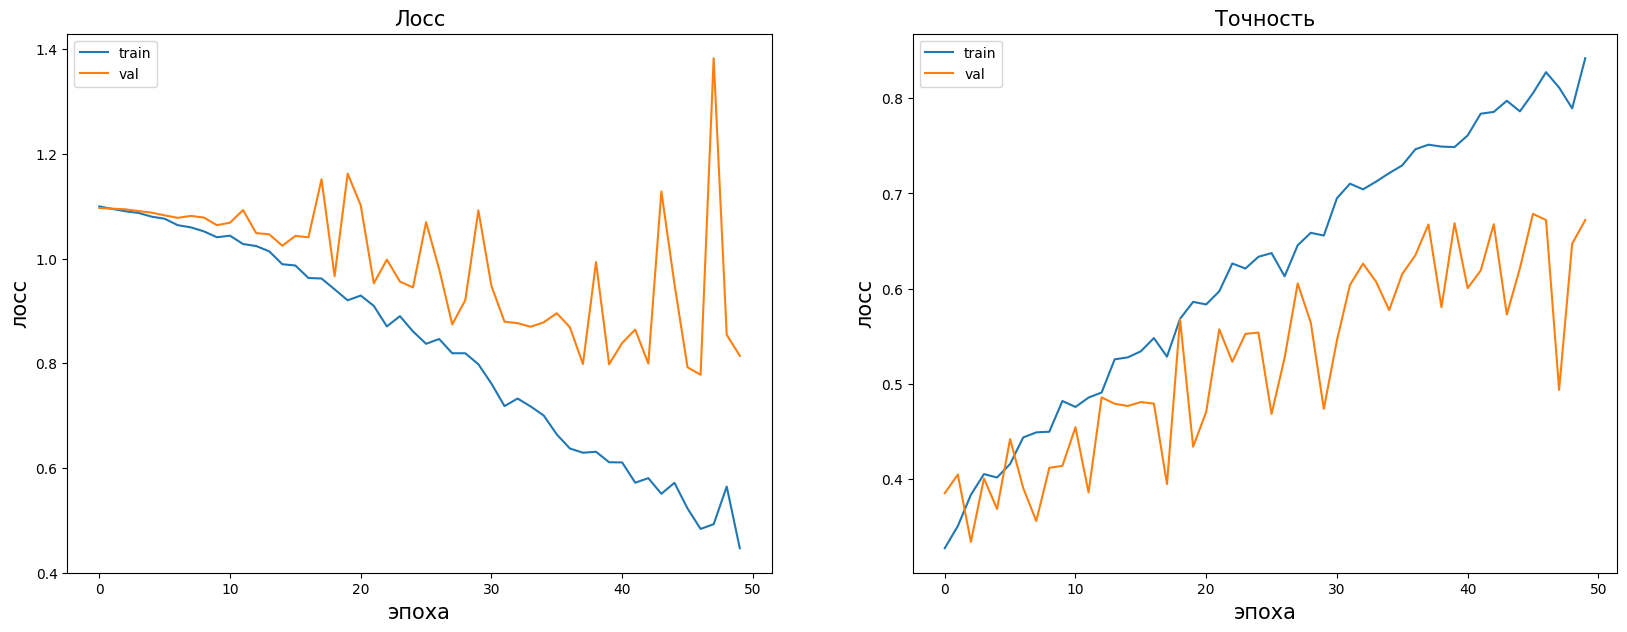

In [81]:
modelDr = ConvNetDr().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(modelDr.parameters(), lr=0.01)

modelDr, historyDr = train(
    modelDr, criterion, optimizer,
    train_batch_gen, val_batch_gen,
    num_epochs=50
)

1 минута на 1 эпоху :(

4. Теперь добавьте на все слои сети и Dropout, и BatchNorm.

Не успеваю обучить до дедлайна ((

In [76]:
class ConvNetAll(nn.Module):
    def __init__(self):
        super(ConvNetAll, self).__init__()

        self.conv1 = nn.Conv2d(3, 16, 4)
        self.mp1 = nn.MaxPool2d(3)
        self.bn1 = nn.BatchNorm2d(16)
        self.droupout1 = nn.Dropout(0.3)
        self.relu1 = nn.ReLU()

        self.conv2 = nn.Conv2d(16, 16, 3)
        self.mp2 = nn.MaxPool2d(2)
        self.bn2 = nn.BatchNorm2d(16)
        self.droupout2 = nn.Dropout(0.3)
        self.relu2 = nn.ReLU()

        self.flatten = nn.Flatten()
        self.fc3 = nn.Linear(23808, 512)
        self.droupout3 = nn.Dropout(0.3)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(512, 3)

    def forward(self, x):
        layer1 = self.mp1(self.conv1(x))
        layer1 = self.relu1(self.droupout1(self.bn1(layer1)))

        layer2 = self.mp2(self.conv2(layer1))
        layer2 = self.relu2(self.droupout2(self.bn2(layer2)))

        out = self.flatten(layer2)
        out = self.relu3(self.droupout3(self.fc3(out)))
        out = self.fc4(out)
        return out

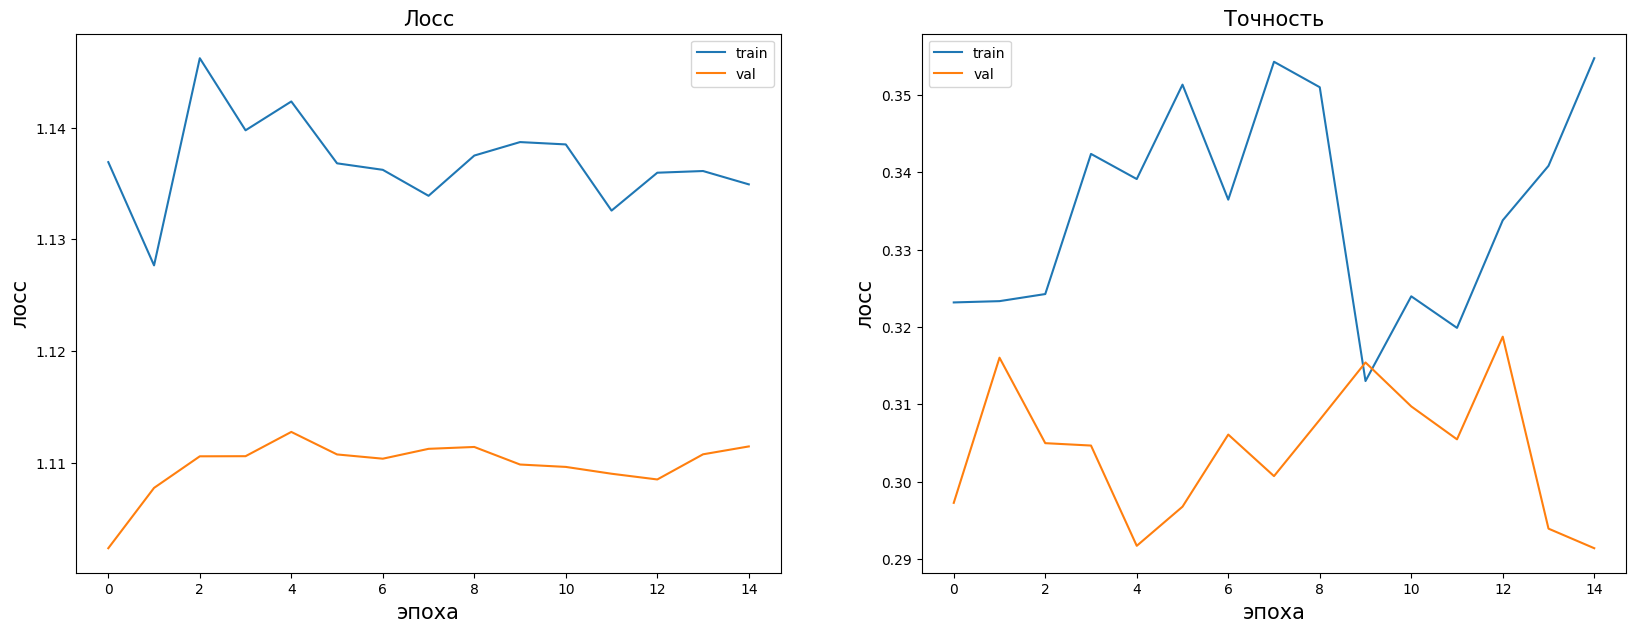

KeyboardInterrupt: ignored

In [77]:
modelAll = ConvNetAll().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

modelAll, historyAll = train(
    modelAll, criterion, optimizer,
    train_batch_gen, val_batch_gen,
    num_epochs=50
)

Проведите сравнение построенных сверточных сетей.

Для наглядности сравнения после обучения всех четырех сетей постройте общий график лосса и метрики качества на обучающей и валидационной выборках.

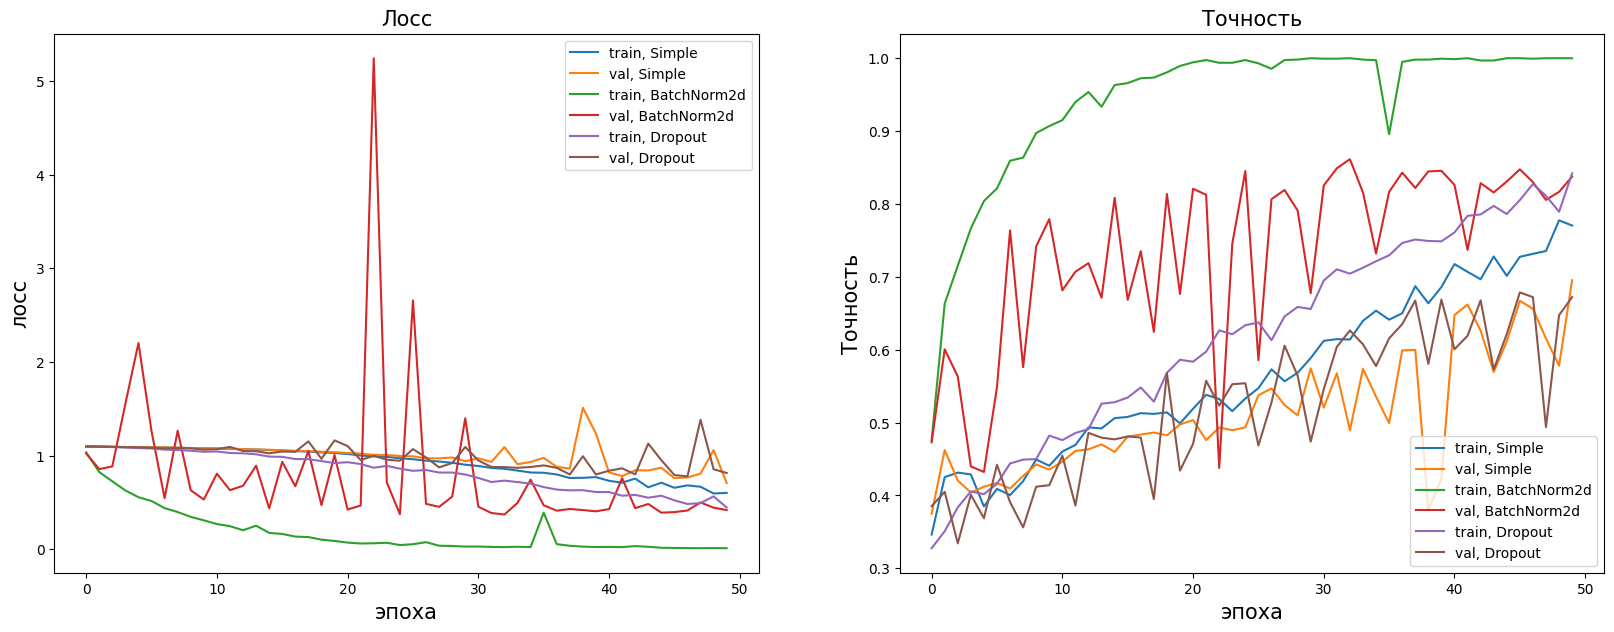

In [82]:
fig = plt.figure(figsize=(20, 7))

plt.subplot(1,2,1)
plt.title('Лосс', fontsize=15)
plt.plot(history['loss']['train'], label='train, Simple')
plt.plot(history['loss']['val'], label='val, Simple')
plt.plot(historyBN['loss']['train'], label='train, BatchNorm2d')
plt.plot(historyBN['loss']['val'], label='val, BatchNorm2d')
plt.plot(historyDr['loss']['train'], label='train, Dropout')
plt.plot(historyDr['loss']['val'], label='val, Dropout')
#plt.plot(historyAll['loss']['train'], label='train, BN + Drop')
#plt.plot(historyAll['loss']['val'], label='val, BN + Drop')
plt.ylabel('лосс', fontsize=15)
plt.xlabel('эпоха', fontsize=15)
plt.legend()



plt.subplot(1,2,2)
plt.title('Точность', fontsize=15)
plt.plot(history['acc']['train'], label='train, Simple')
plt.plot(history['acc']['val'], label='val, Simple')
plt.plot(historyBN['acc']['train'], label='train, BatchNorm2d')
plt.plot(historyBN['acc']['val'], label='val, BatchNorm2d')
plt.plot(historyDr['acc']['train'], label='train, Dropout')
plt.plot(historyDr['acc']['val'], label='val, Dropout')
#plt.plot(historyAll['acc']['train'], label='train, BN + Drop')
#plt.plot(historyAll['acc']['val'], label='val, BN + Drop')
plt.ylabel('Точность', fontsize=15)
plt.xlabel('эпоха', fontsize=15)
plt.legend()
plt.show()

**Вывод**


Лучший результат показала нейронка с BatchNorm, хоть она явно переобучилась на трейне. Простая нн и нн с дропаутом показали схожие результаты, хоть обучение второй происходило в 5 раз медленнее.

Все нн показывают схожие провалы точности. моя основная гипотеза состоит в том, что lr слишком большой и коэфициенты проскакивают нужное значение. Это можно проверить дальнейшими экспериментами с оптимизаторами

### II. Сравнение различных оптимизаторов

Обучите несколько нейронных сетей с различными оптимизаторами. Например, можно использовать `SGD`, `rmsprop`, `adam`, `adagrad` из `torch.optim`.

Проведите сравнение работы данных нейронных сетей и выберете лучший оптимизатор для вашей конкретной задачи.

 Буду использовать простую модель, чтобы было быстрее

 SGD уже использовалось

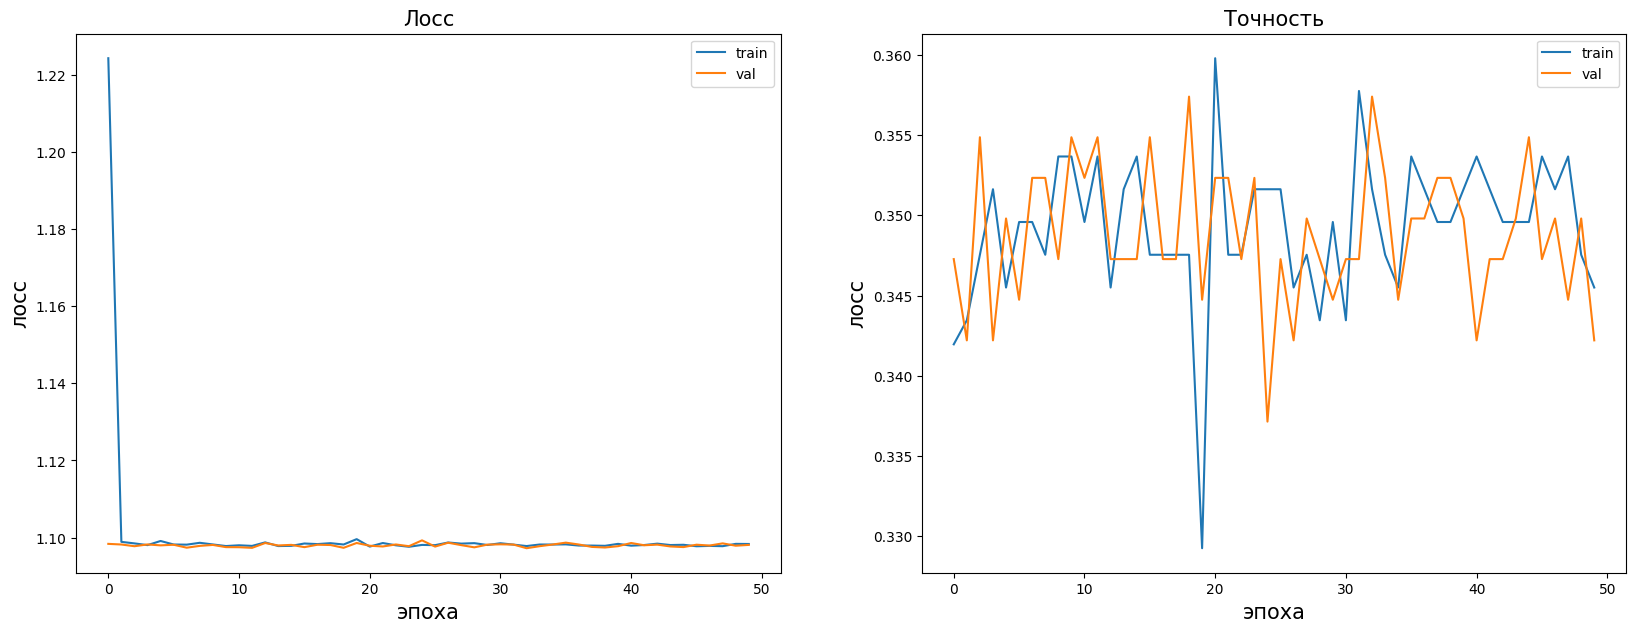

In [85]:
modelAdam = SimpleConvNet().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(modelAdam.parameters(), lr=0.005)

modelAdam, historyAdam = train(
    modelAdam, criterion, optimizer,
    train_batch_gen, val_batch_gen,
    num_epochs=50
)

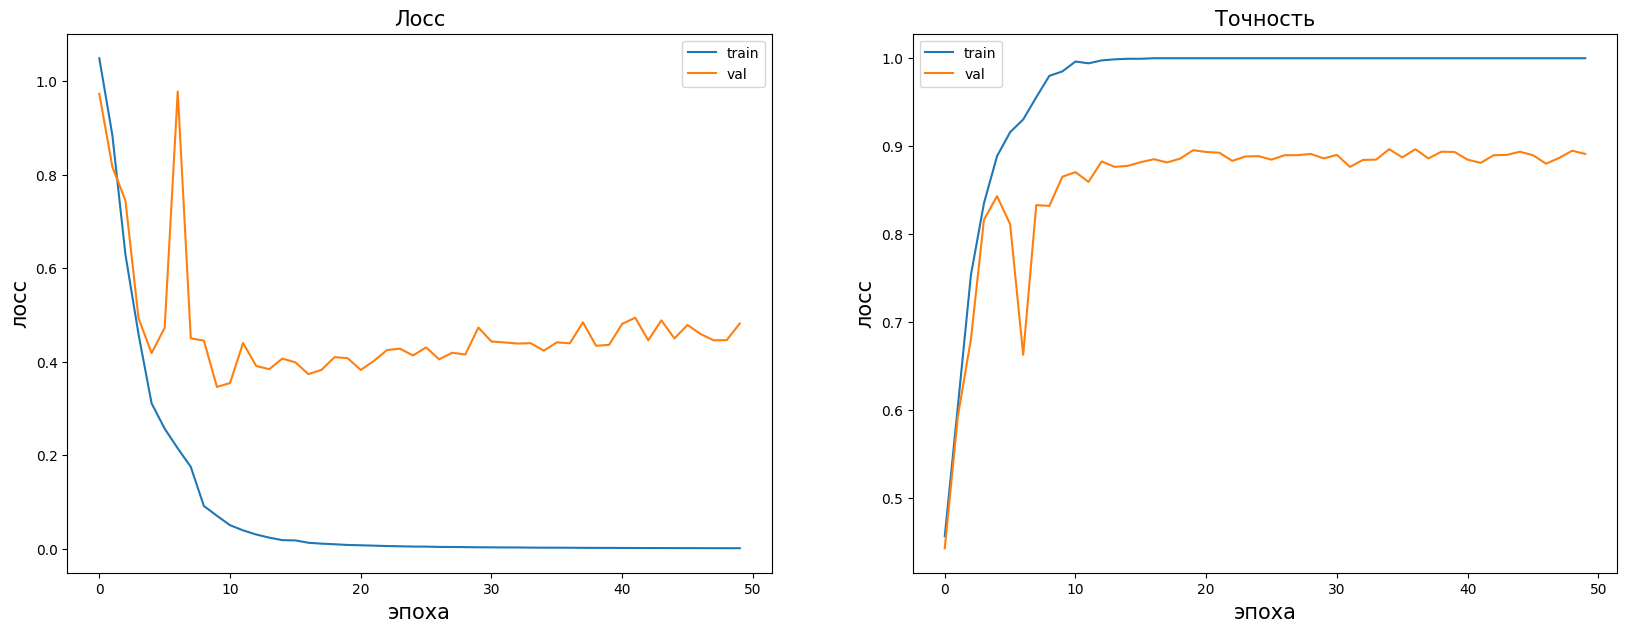

In [86]:
modelAdagrad = SimpleConvNet().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adagrad(modelAdagrad.parameters(), lr=0.005)

modelAdagrad, historyAdagrad = train(
    modelAdagrad, criterion, optimizer,
    train_batch_gen, val_batch_gen,
    num_epochs=50
)

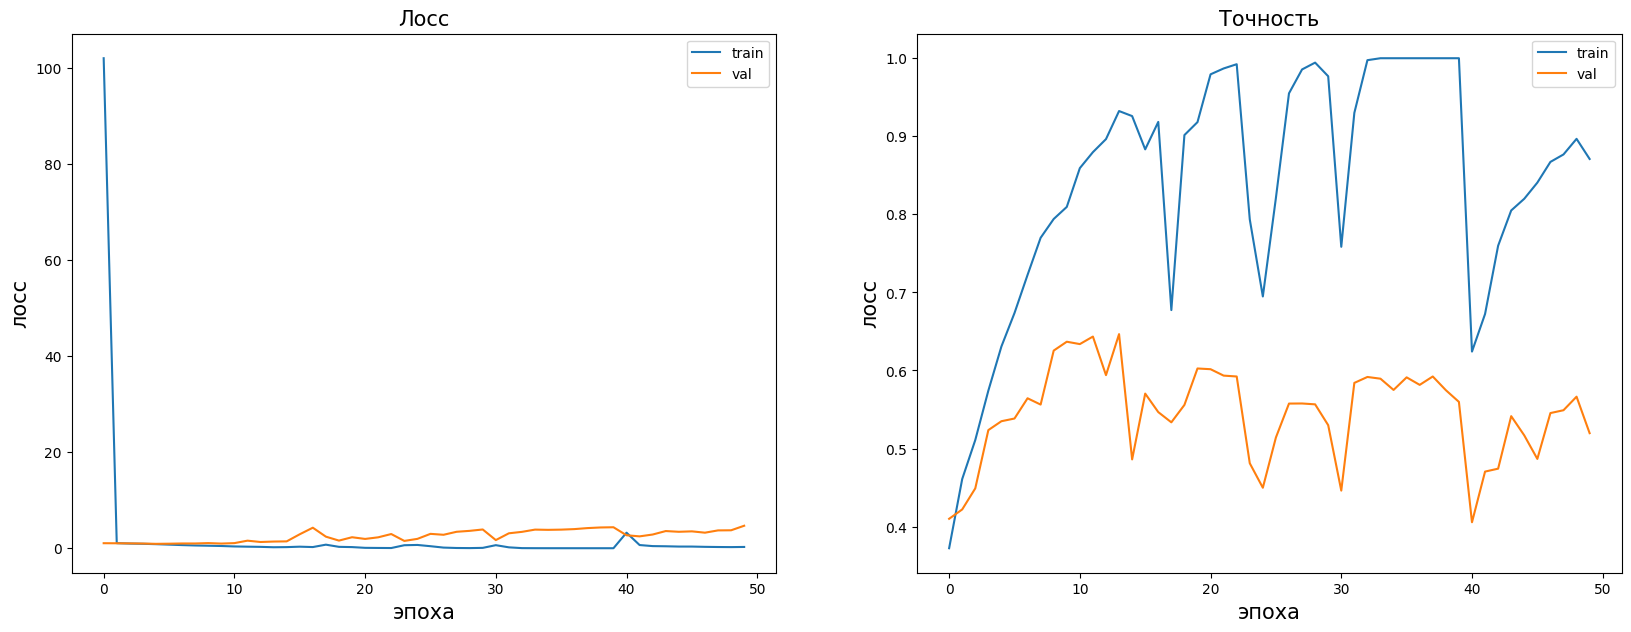

In [89]:
modelRMS = SimpleConvNet().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.RMSprop(modelRMS.parameters(), lr=0.005)

modelRMS, historyRMS = train(
    modelRMS, criterion, optimizer,
    train_batch_gen, val_batch_gen,
    num_epochs=50
)

Проведите сравнение построенных сверточных сетей.

Для наглядности сравнения после обучения всех сетей с различными оптимизаторами постройте общий график лосса и метрики качества на обучающей и валидационной выборках.

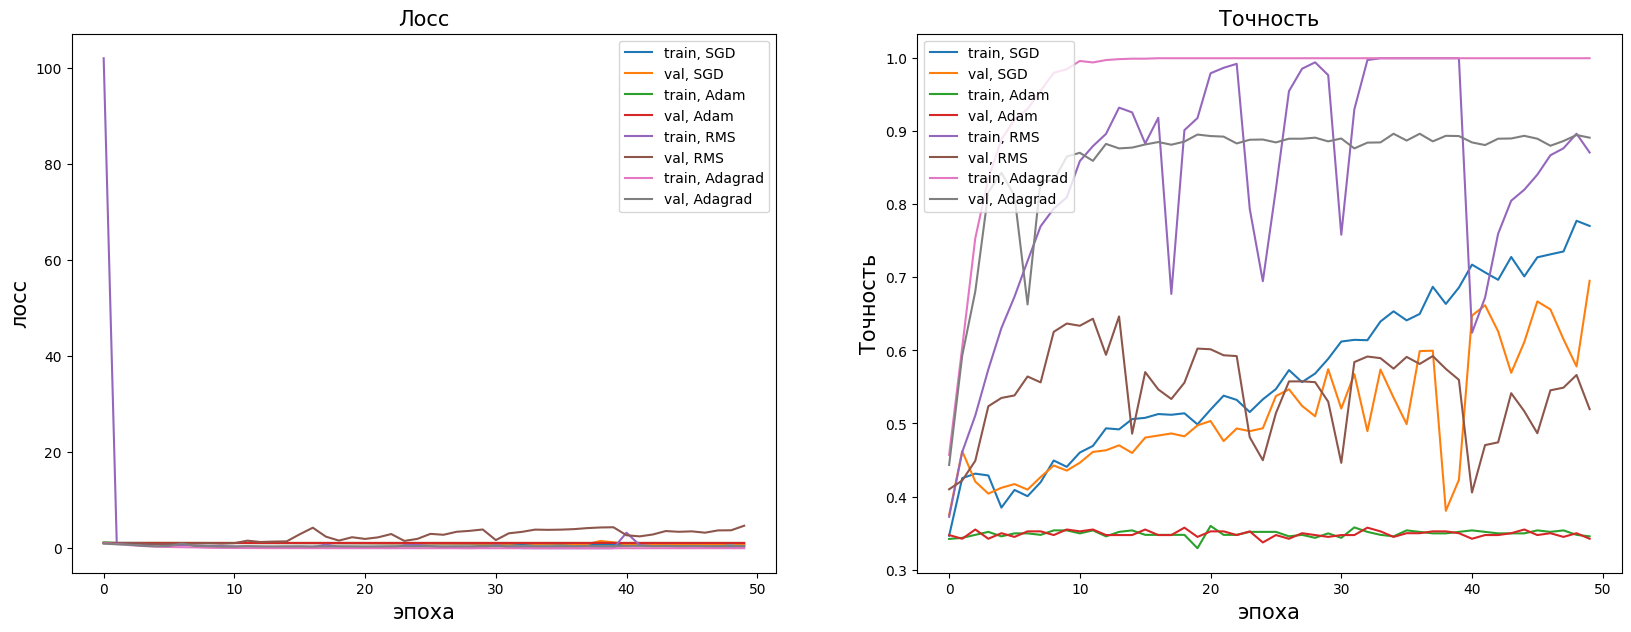

In [90]:
fig = plt.figure(figsize=(20, 7))

plt.subplot(1,2,1)
plt.title('Лосс', fontsize=15)
plt.plot(history['loss']['train'], label='train, SGD')
plt.plot(history['loss']['val'], label='val, SGD')
plt.plot(historyAdam['loss']['train'], label='train, Adam')
plt.plot(historyAdam['loss']['val'], label='val, Adam')
plt.plot(historyRMS['loss']['train'], label='train, RMS')
plt.plot(historyRMS['loss']['val'], label='val, RMS')
plt.plot(historyAdagrad['loss']['train'], label='train, Adagrad')
plt.plot(historyAdagrad['loss']['val'], label='val, Adagrad')

plt.ylabel('лосс', fontsize=15)
plt.xlabel('эпоха', fontsize=15)
plt.legend()


plt.subplot(1,2,2)
plt.title('Точность', fontsize=15)
plt.plot(history['acc']['train'], label='train, SGD')
plt.plot(history['acc']['val'], label='val, SGD')
plt.plot(historyAdam['acc']['train'], label='train, Adam')
plt.plot(historyAdam['acc']['val'], label='val, Adam')
plt.plot(historyRMS['acc']['train'], label='train, RMS')
plt.plot(historyRMS['acc']['val'], label='val, RMS')
plt.plot(historyAdagrad['acc']['train'], label='train, Adagrad')
plt.plot(historyAdagrad['acc']['val'], label='val, Adagrad')

plt.ylabel('Точность', fontsize=15)
plt.xlabel('эпоха', fontsize=15)
plt.legend()

**Вывод**


С Adam непонятно что получилось

Adagred с одной стороны явное переобучение(судя по точности на трейне), а с другой - высокая точность на валидации, выше SGD

RMSprop переобучение + что-то странное

Для лучшего оптимизатора попробуйте поварьировать значение параметров (например, `learning rate`, `momentum` и так далее). Четырех различных значений для каждого параметра будет достаточно. Сравните результаты обучения, построив аналогичные общие графики лосса и метрики качества.

**Вывод**


### III. Способы борьбы с переобучением

Мы знаем, что нейронные сети часто в какой-то момент начинают переобучаться. Есть целый набор различных способов борьбы с данным явлением.

В данном пункте вам предлагается попробовать использовать две различные методики:
`torch.optim.lr_scheduler` и `Label Smoothing`.

Обучите еще две сверточные сети, пользуясь данными методами борьбы с переобучением, и сравните их результаты со своей лучшей обученной нейронной сетью из прошлого пункта.

**Вывод**


Протестируйте своё лучшее решение:


In [ ]:
# Используйте test_dataset только для финальной оценки качества
test_dataset = ...

In [ ]:
test_f1_score = ...

In [ ]:
print("Итоговый результат:")
print("Test F1 score:\t\t{:.2f} %".format(test_f1_score * 100))

### Задача 2.

На семинаре вы уже познакомились с основными методами оптимизации, которые широко используются в классическом машинном обучении. С развитием нейронных сетей и активным внедрением нейросетевого подхода, методы оптимизации стали ещё более актуальными. Но стандартные методы оптимизации, SGD и метод тяжёлого шара, имеют ряд недостатков, из-за чего их редко применяют в чистом виде. Для обучения современных нейросетей используют более продвинутые методы.

В данной задаче вам предстоит самостоятельно реализовать различные оптимизаторы (запущенные из одной точки) и сравнить скорости их сходимости.

Пусть задача оптимизации имеет вид $f(x) \longrightarrow \min\limits_x$, и $\nabla_{x} f(x)$ &mdash; градиент функции $f(x)$.

In [ ]:
from IPython.display import Image, clear_output

In [ ]:
! apt-get install imagemagick

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript gsfonts
  imagemagick-6-common imagemagick-6.q16 libdjvulibre-text libdjvulibre21
  libfftw3-double3 libgs9 libgs9-common libidn12 libijs-0.35 libjbig2dec0
  libjxr-tools libjxr0 liblqr-1-0 libmagickcore-6.q16-6
  libmagickcore-6.q16-6-extra libmagickwand-6.q16-6 libnetpbm10
  libwmflite-0.2-7 netpbm poppler-data
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf fonts-texgyre
  ghostscript-x imagemagick-doc autotrace cups-bsd | lpr | lprng enscript gimp
  gnuplot grads hp2xx html2ps libwmf-bin mplayer povray radiance sane-utils
  texlive-base-bin transfig ufraw-batch libfftw3-bin libfftw3-dev inkscape
  poppler-utils fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-gothic fonts-arphic-ukai
  fonts-arphic-uming fon

#### 1. SGD

Обычный и стохастический градиентный спуск.

$$x_{t + 1} = x_t - \eta v_t,$$

где $v_{t} = \nabla f(x_{t})$ &mdash; аналогия со скоростью.

In [ ]:
def sgd(init_parameters, func_grad, lr, n_iter):
    '''
    Метод оптимизации SGD.

    Параметры:
    - parameters - начальное приближение параметров,
    - func_grad - функция, задающая градиент оптимизируемой функции,
    - lr - скорость обучения,
    - n_iter - количество итераций метода.

    Возвращает историю обновлений параметров.
    '''

    parameters = init_parameters.copy()
    history = [parameters.copy()]

    for i in range(n_iter):
        parameters = parameters - lr*func_grad(parameters)
        history = np.concatenate((history, [parameters.copy()]), axis = 0)

    return history

#### 2. SGD + Momentum

Сгладим градиент, используя информацию о том, как градиент изменялся раньше.
Физическая аналогия &mdash; добавляем инерцию.


$$x_{t + 1} = x_t + v_{t},$$
где $v_{t} = \mu v_{t - 1} - \eta \nabla f(x_{t})$ &mdash; сглаживаем градиенты.

In [ ]:
def sgd_momentum(init_parameters, func_grad, lr, mu, n_iter):
    '''
    Метод оптимизации SGD Momentum.

    Параметры:
    - parameters - начальное приближение параметров,
    - func_grad - функция, задающая градиент оптимизируемой функции,
    - lr - скорость обучения,
    - mu - коэффициент сглаживания,
    - n_iter - количество итераций метода.

    Возвращает историю обновлений параметров.
    '''
    parameters = init_parameters.copy()
    history = [parameters.copy()]
    vt = 0

    for i in range(n_iter):
        vt = mu*vt - lr*func_grad(parameters)
        parameters = parameters +  vt
        history = np.concatenate((history, [parameters.copy()]), axis = 0)

    return history

#### 3. Adagrad

Adagrad &mdash; один из самых первых адаптивных методов оптимизации.

Во всех изученных ранее методах есть необходимость подбирать шаг метода (коэффициент $\eta$). На каждой итерации все компоненты градиента оптимизируемой функции домножаются на одно и то же число $\eta$. Но использовать одно значение $\eta$ для всех параметров не оптимально, так как они имеют различные распределения и оптимизируемая функция изменяется с совершенно разной скоростью при небольших изменениях разных параметров.

Поэтому гораздо логичнее **изменять значение каждого параметра с индивидуальной скоростью**. При этом, *чем c большей степени от изменения параметра меняется значение оптимизируемой функции, тем с меньшей скоростью стоить обновлять этот параметр*. Иначе высок шанс расходимости метода. Получить такой результат удается, если разделить градиент на сумму квадратов скорости изменений параметров.

Пусть $x^{(i)}$ &mdash; $i$-я компонента вектора $x$.
$$x_{t+1, i} = x_{t, i} - \frac{\eta}{\sqrt{g_{t, i}+\varepsilon}}\cdot \nabla f_i(x_t)$$
$$g_{t} = g_{t-1} + \nabla f(x_t) \odot \nabla f(x_t)$$


В матрично-векторном виде шаг алгоритма можно переписать так:
$$x_{t+1} = x_{t} - \frac{\eta}{\sqrt{g_{t} + \varepsilon}}\odot \nabla f(x_t).$$
Здесь $\odot$ обозначает произведение Адамара, т.е. поэлементное перемножение векторов.

In [ ]:
def adagrad(init_parameters, func_grad, lr, eps, n_iter):
    '''
    Метод оптимизации Adagrad.

    Параметры:
    - parameters - начальное приближение параметров,
    - func_grad - функция, задающая градиент оптимизируемой функции,
    - lr - скорость обучения,
    - eps - минимальное значение нормирующего члена,
    - n_iter - количество итераций метода.

    Возвращает историю обновлений параметров.
    '''
    parameters = init_parameters.copy()
    history = [parameters.copy()]
    g = [0,0]

    for iter_id in range(n_iter):
      g = g + func_grad(parameters) * func_grad(parameters)
      parameters = parameters - lr/np.sqrt(g + eps)*func_grad(parameters)
      history = np.concatenate((history, [parameters.copy()]), axis = 0)

    return history

#### 4. RMSProp

Алгоритм RMSProp основан на той же идее, что и алгоритм Adagrad &mdash; адаптировать learning rate отдельно для каждого параметра $\theta^{(i)}$.  Однако Adagrad имеет серьёзный недостаток. Он с одинаковым весом учитывает квадраты градиентов как с самых первых итераций, так и с самых последних. Хотя, на самом деле, наибольшую значимость имеют модули градиентов на последних нескольких итерациях.

Для этого предлагается использовать **экспоненциальное сглаживание**.
$$x_{t+1} = x_{t} - \frac{\eta}{\sqrt{g_{t} + \varepsilon}}\odot \nabla f(x_t).$$
$$g_t = \mu g_{t-1} + (1-\mu) \nabla f(x_t) \odot \nabla f(x_t)$$

Стандартные значения гиперпараметров: $\mu = 0.9, \eta = 0.001$.

In [ ]:
def rmsprop(init_parameters, func_grad, lr, mu, eps, n_iter):
    '''
    Метод оптимизации RMSProp.

    Параметры:
    - parameters - начальное приближение параметров,
    - func_grad - функция, задающая градиент оптимизируемой функции,
    - lr - скорость обучения,
    - mu - коэффициент сглаживания,
    - eps - минимальное значение нормирующего члена,
    - n_iter - количество итераций метода.

    Возвращает историю обновлений параметров.
    '''

    parameters = init_parameters.copy()
    history = [parameters.copy()]
    g = np.array([0.,0.], dtype = float)
    for iter_id in range(n_iter):

        g = mu*g + (1-mu) * func_grad(parameters) * func_grad(parameters)
        parameters = parameters - lr/np.sqrt(g + eps)*func_grad(parameters)
        history = np.concatenate((history, [parameters.copy()]), axis = 0)

    return history

**5. Adam**

Этот алгоритм совмещает в себе 2 идеи:
* идею алгоритма Momentum *о накапливании градиента*,
* идею методов Adadelta и RMSProp *об экспоненциальном сглаживании* информации о предыдущих значениях квадратов градиентов.

Благодаря использованию этих двух идей, метод имеет 2 преимущества над большей частью методов первого порядка, описанных выше:


1. Он обновляет все параметры $\theta$ не с одинаковым `learning rate`, а выбирает для каждого $\theta_i$ индивидуальный `learning rate`, что *позволяет учитывать разреженные признаки с большим весом*.


2. Adam за счёт применения экспоненциального сглаживания к градиенту *работает более устойчиво в окрестности оптимального значения параметра $\theta^*$*, чем методы, использующие градиент в точке $x_t$, не накапливая значения градиента с прошлых шагов.


Формулы шага алгоритма выглядят так:
$$v_{t + 1} = \beta v_{t} + (1-\beta) \nabla f(x_{t})$$
$$g_t = \mu g_{t-1} + (1-\mu) \nabla f(x_t) \odot \nabla f(x_t)$$

Чтобы эти оценки не были смещёнными, нужно их отнормировать:
$$\widehat{v}_{t + 1} = \frac{v_{t + 1}}{1-\beta^t},$$
$$\widehat{g}_t = \frac{g_t}{1-\mu^t}.$$

Тогда получим итоговую формулу шага:

$$x_{t+1} = x_t - \frac{\eta}{\sqrt{\widehat{g}_t + \varepsilon}} \odot \widehat{v}_{t + 1}.$$

In [ ]:
def adam(init_parameters, func_grad, eps, lr, beta, mu,  n_iter):
    '''
    Adam.

    Параметры.
    1) theta0 - начальное приближение theta,
    2) func_grad - функция, задающая градиент оптимизируемой функции,
    3) eps - мин. возможное значение знаменателя,
    4) lr - скорость обучения,
    5) beta - параметр экспоненциального сглаживания,
    6) mu - параметр экспоненциального сглаживания,
    7) n_iter - количество итераций метода.
    '''

    parameters = init_parameters.copy()
    history = [parameters.copy()]
    g = np.array([0.,0.], dtype = float)
    vt = 0

    for iter_id in range(1, n_iter+1):
        vt = beta*vt - (1-beta)*func_grad(parameters)
        g = mu*g + (1-mu) * func_grad(parameters) * func_grad(parameters)
        parameters = parameters + lr/np.sqrt(g/(1-mu**iter_id) + eps)*vt/(1-beta**iter_id)
        history = np.concatenate((history, [parameters.copy()]), axis = 0)

    return history

Сравнение оптимизаторов будем производить на примере двух функций:
1. $f(x, y) = 5*x^2 + y^2$
2. $f(x, y) = (x-3)^2 + 8(y-5)^4 + \sqrt{x} + \sin(xy)$

Реализуйте данные функции в ячейке ниже для удобства и читаемости кода.

In [ ]:
def square_sum(x):
    ''' f(x, y) = 5 * x^2 + y^2 '''

    return 5*x[0]**2 +  x[1]**2

def square_sum_grad(x):
    ''' grad f(x, y) = <..> '''

    return 10*x[0] + 2*x[1]


def complex_sum(x):
    ''' f(x, y) = (x-3)^2 + 8(y-5)^4 + sqrt(x) + sin(xy)'''

    return (x[0]-3)**2 + 8*(x[1]-5)**4 + np.sqrt(x[0]) + np.sin(x[0]*x[1])

def complex_sum_grad(x):
    ''' grad f(x, y) = <..> '''

    partial_x = 2*x[0]-6-1/2/np.sqrt(x[0]) + x[1]*np.cos(x[0]*x[1])
    partial_y = 32*(x[1]-5)**3 + x[0]*np.cos(x[0]*x[1])

    return np.array([partial_x, partial_y])

Создадим директорию, в которой будем хранить визуализацию экспериментов.

In [ ]:
!rm -rf saved_gifs
!mkdir saved_gifs

Напишем функцию, которая будет отрисовывать процесс оптимизации.

In [ ]:
def make_experiment(func, trajectory, graph_title,
                    min_y=-7, max_y=7, min_x=-7, max_x=7):
    '''
    Функция, которая для заданной функции рисует её линии уровня,
    а также траекторию сходимости метода оптимизации.

    Параметры.
    1) func - оптимизируемая функция,
    2) trajectory - траектория метода оптимизации,
    3) graph_name - заголовок графика.
    '''

    fig, ax = plt.subplots(figsize=(10, 8))
    xdata, ydata = [], []
    ln, = plt.plot([], [])

    mesh_x = np.linspace(min_x, max_x, 300)
    mesh_y = np.linspace(min_y, max_y, 300)
    X, Y = np.meshgrid(mesh_x, mesh_y)
    Z = np.zeros((len(mesh_x), len(mesh_y)))

    for coord_x in range(len(mesh_x)):
        for coord_y in range(len(mesh_y)):
            Z[coord_y, coord_x] = func(
                np.array((mesh_x[coord_x],
                          mesh_y[coord_y]))
            )

    def init():
        ax.contour(
            X, Y, np.log(Z),
            np.log([0.5, 10, 30, 80, 130, 200, 300, 500, 900]),
            cmap='winter'
        )
        ax.set_title(graph_title)
        return ln,

    def update(frame):
        xdata.append(trajectory[frame][0])
        ydata.append(trajectory[frame][1])
        ln.set_data(xdata, ydata)
        return ln,

    ani = FuncAnimation(
        fig, update, frames=range(len(trajectory)),
        init_func=init, repeat=True
    )
    writer = ImageMagickFileWriter(fps=10)
    ani.save(f'saved_gifs/{graph_title}.gif',
             writer=writer)
    plt.show()

### Простая функция $f(x, y) = x^2 + y^2$

In [ ]:
parameters = np.array((5, 5), dtype=float)
func_name = '$f(x, y) = 5x^2 + y^2$'
func_grad = square_sum_grad
func = square_sum
n_iter = 100

**SGD**

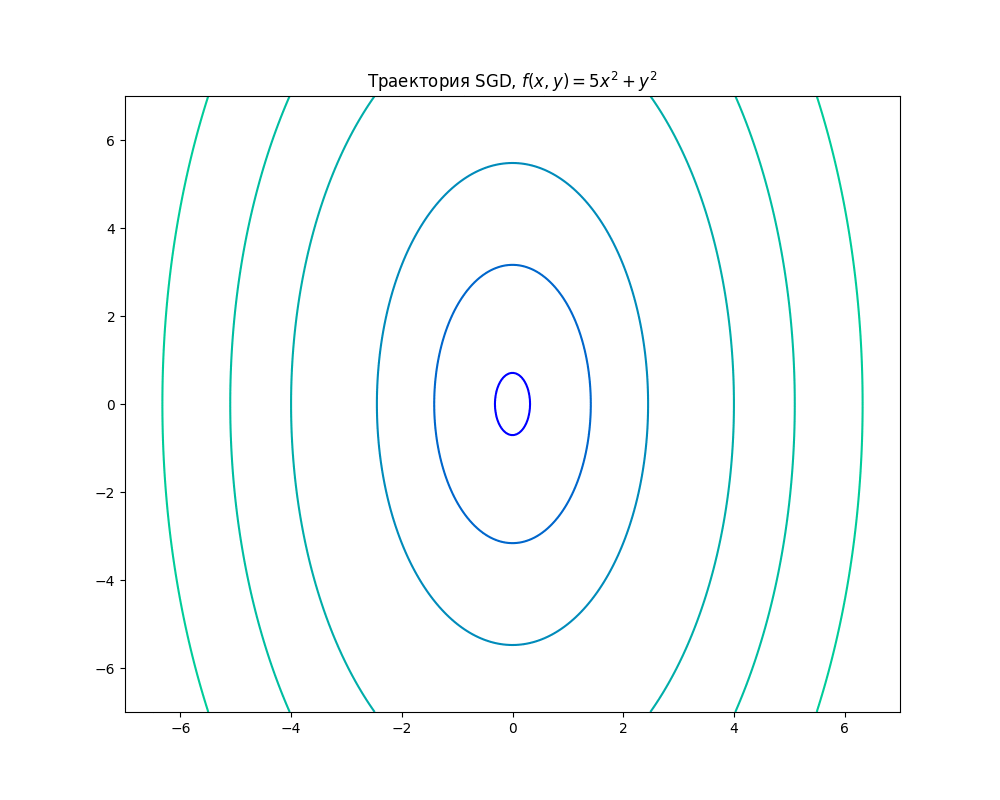

In [ ]:
sgd_trajectory = sgd(
    init_parameters=parameters,
    func_grad=func_grad,
    lr=0.01,
    n_iter=n_iter
)
graph_title = 'Траектория SGD, ' + func_name
make_experiment(
    func,
    sgd_trajectory,
    graph_title,
)
clear_output()
Image(open(f'saved_gifs/{graph_title}.gif','rb').read())

**SGD Momentum**

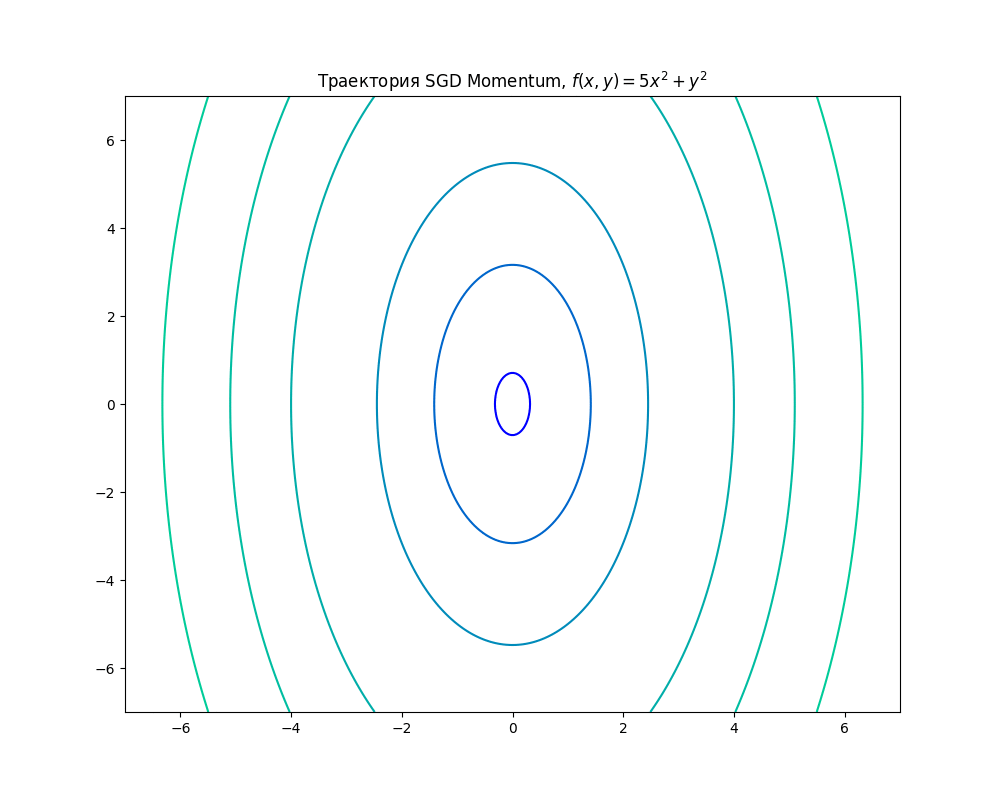

In [ ]:
sgd_momentum_trajectory = sgd_momentum(
    init_parameters=parameters.copy(),
    func_grad=func_grad,
    lr=0.01,
    n_iter=n_iter,
    mu=0.9
)
graph_title = 'Траектория SGD Momentum, ' + func_name
make_experiment(
    func,
    sgd_momentum_trajectory,
    graph_title,
)
clear_output()
Image(open(f'saved_gifs/{graph_title}.gif','rb').read())

**Adagrad**

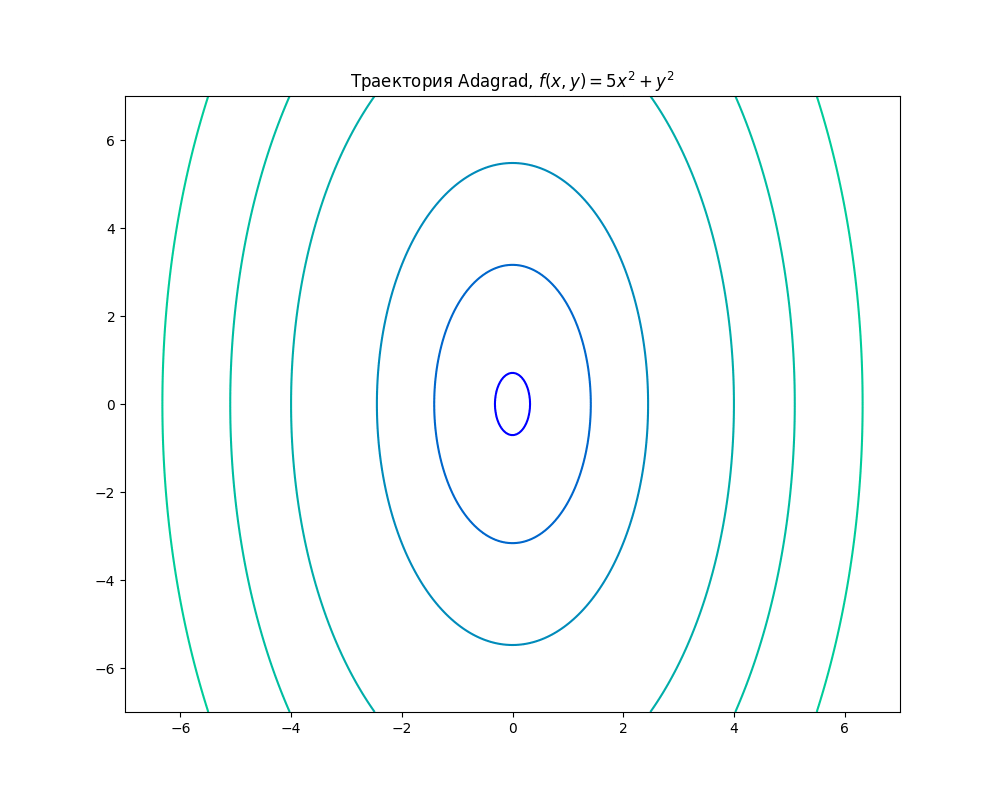

In [ ]:
adagrad_trajectory = adagrad(
    init_parameters=parameters.copy(),
    func_grad=func_grad,
    lr=0.1,
    n_iter=n_iter,
    eps=1e-6,
)
graph_title = 'Траектория Adagrad, ' + func_name
make_experiment(
    func,
    adagrad_trajectory,
    graph_title,
)
clear_output()
Image(open(f'saved_gifs/{graph_title}.gif','rb').read())

**RMSProp**

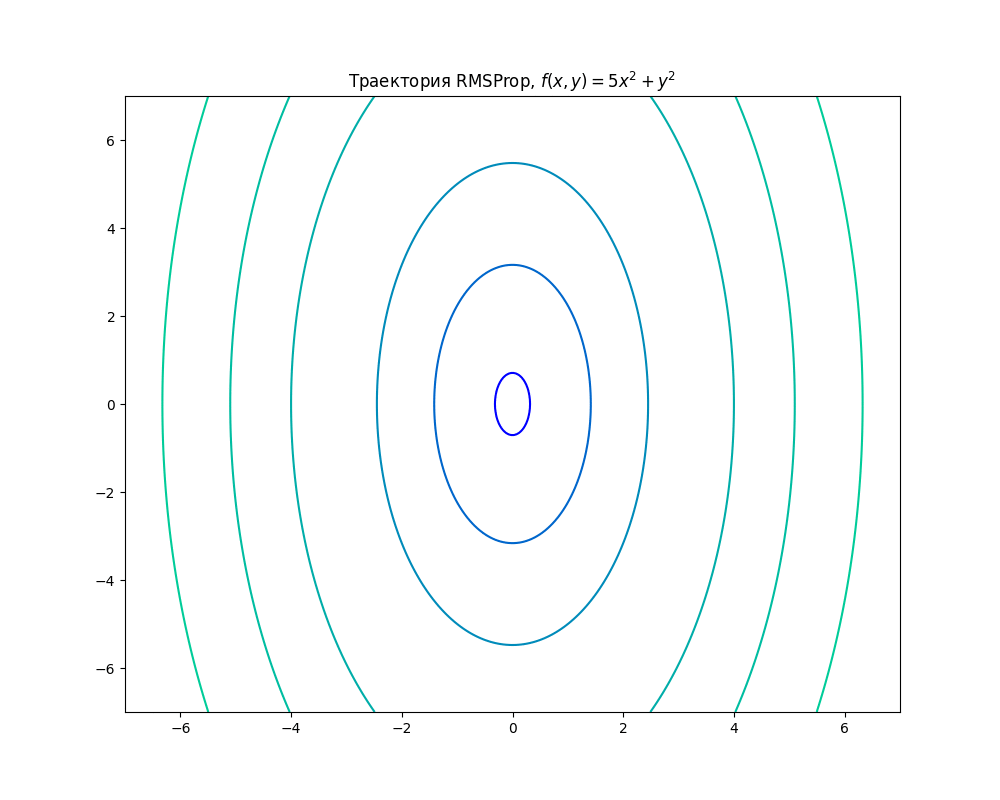

In [ ]:
rmsprop_trajectory = rmsprop(
    init_parameters=parameters.copy(),
    func_grad=func_grad,
    lr=0.1,
    n_iter=n_iter,
    eps=1e-6,
    mu=0.9
)
graph_title = 'Траектория RMSProp, ' + func_name
make_experiment(
    func,
    rmsprop_trajectory,
    graph_title,
)
clear_output()
Image(open(f'saved_gifs/{graph_title}.gif','rb').read())

**Adam**

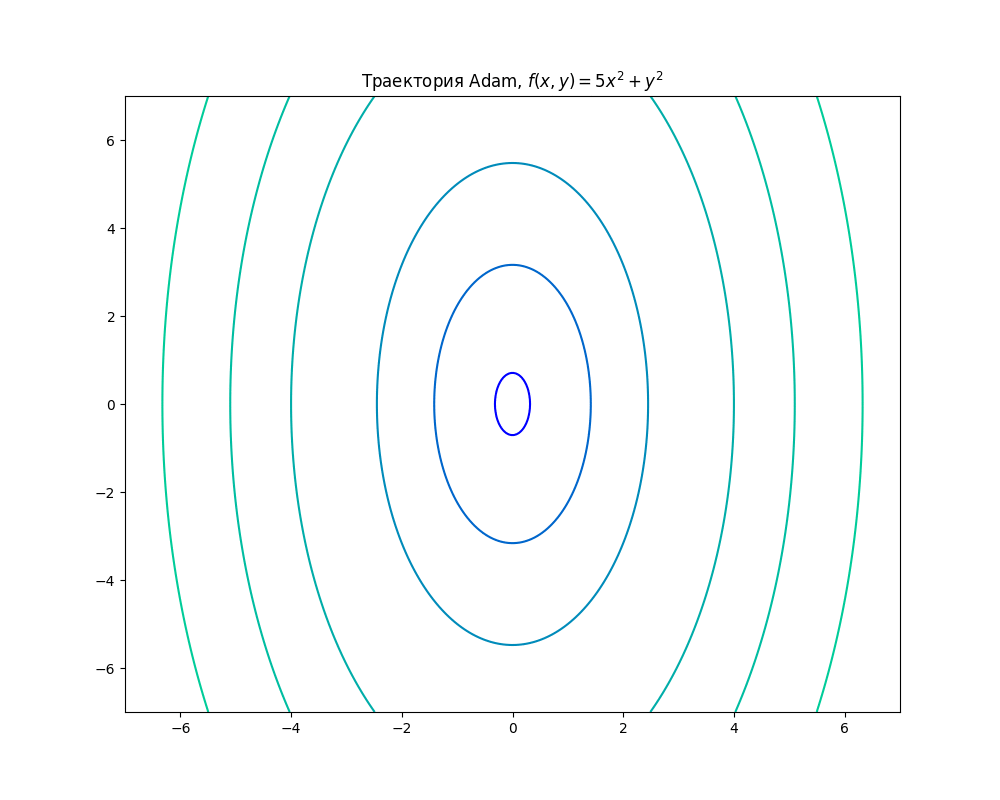

In [ ]:
adam_trajectory = adam(
    init_parameters=parameters.copy(),
    func_grad=func_grad,
    lr=0.1,
    n_iter=n_iter,
    eps=1e-6,
    mu=0.9,
    beta=0.9
)
graph_title = 'Траектория Adam, ' + func_name
make_experiment(
    func,
    adam_trajectory,
    graph_title,
)
clear_output()
Image(open(f'saved_gifs/{graph_title}.gif','rb').read())

**Вывод**

### Сложная функция $f(x, y) = (x-3)^2 + 8(y-5)^4 + \sqrt{x} + \sin(xy)$

In [ ]:
parameters = np.array((5, -2), dtype=float)
func_name = '$f(x, y) = (x-3)^2 + 8(y-5)^4 + \sqrt{x} + \sin(xy)$'
func_grad = complex_sum_grad
func = complex_sum
n_iter = 100

**SGD**

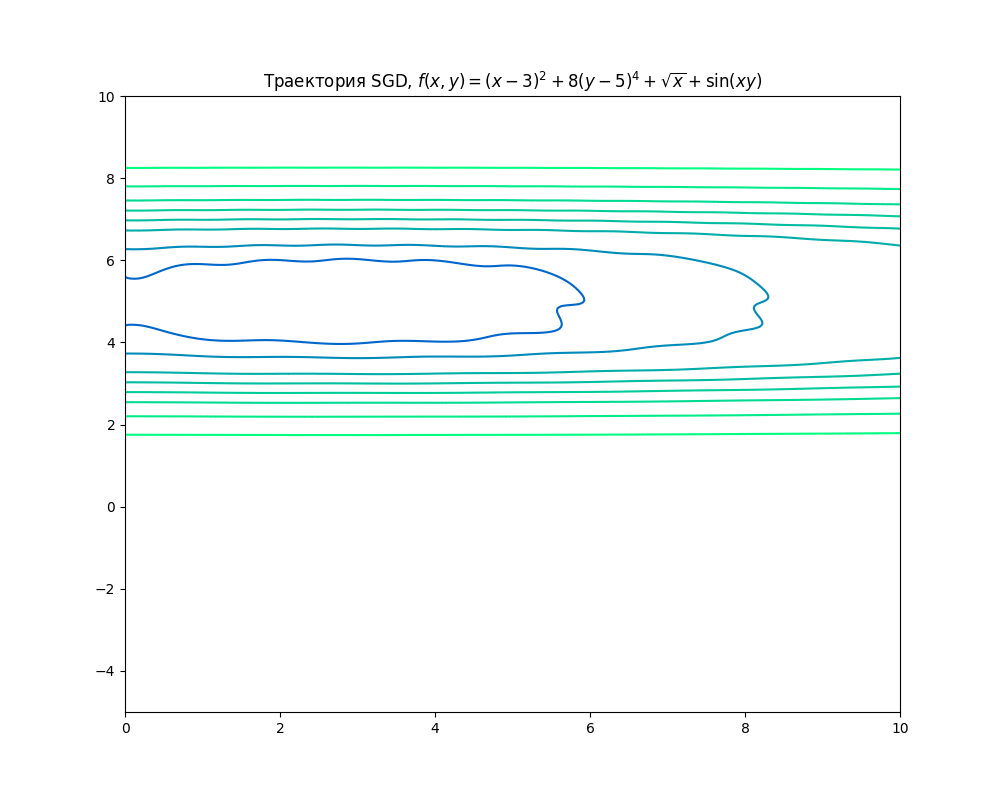

In [ ]:
sgd_trajectory = sgd(
    init_parameters=parameters,
    func_grad=func_grad,
    lr=0.0002,
    n_iter=n_iter
)
graph_title = 'Траектория SGD, ' +  func_name
make_experiment(
    func,
    sgd_trajectory,
    graph_title,
    -5, 10, 0, 10
)
clear_output()
Image(open(f'saved_gifs/{graph_title}.gif','rb').read())

**SGD Momentum**

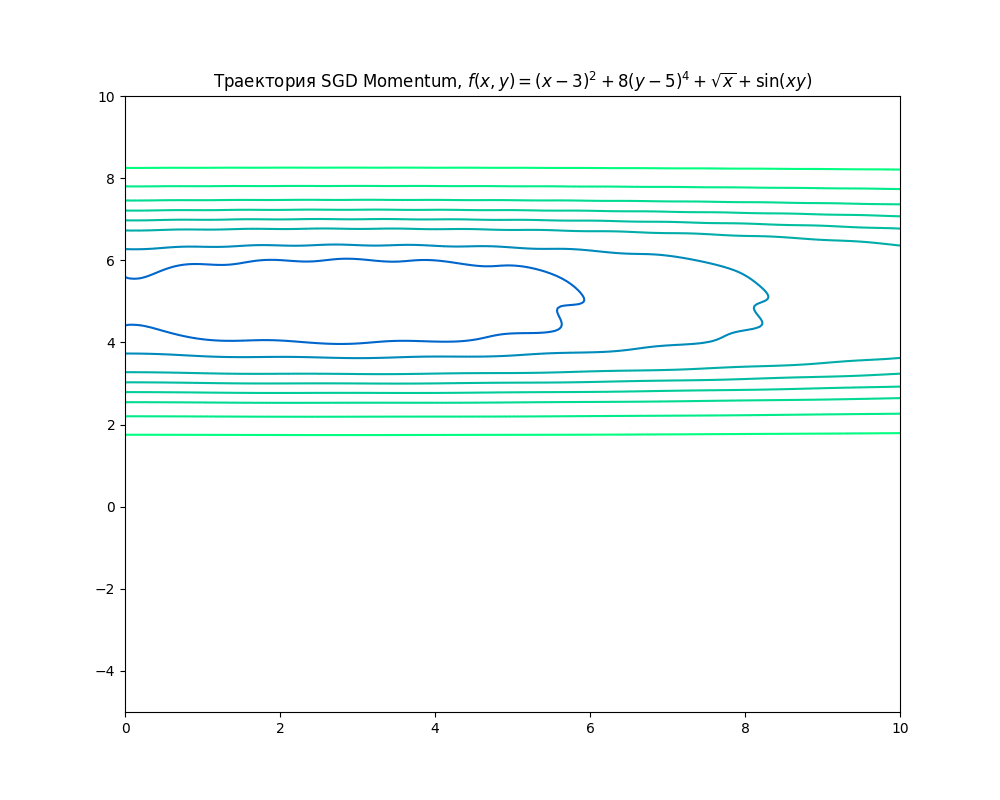

In [ ]:
sgd_momentum_trajectory = sgd_momentum(
    init_parameters=parameters.copy(),
    func_grad=func_grad,
    lr=0.0002,
    n_iter=n_iter,
    mu=0.7
)
graph_title = 'Траектория SGD Momentum, ' +  func_name
make_experiment(
    func,
    sgd_momentum_trajectory,
    graph_title,
    -5, 10, 0, 10
)
clear_output()
Image(open(f'saved_gifs/{graph_title}.gif','rb').read())

**Adagrad**

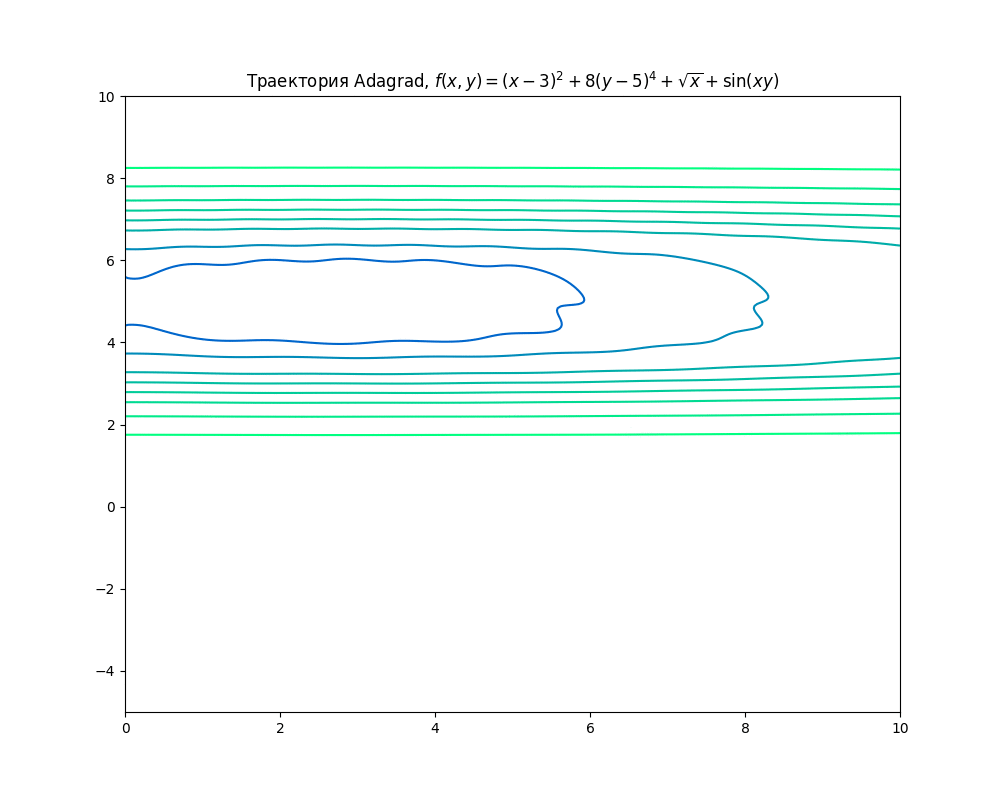

In [ ]:
adagrad_trajectory = adagrad(
    init_parameters=parameters.copy(),
    func_grad=func_grad,
    lr=0.1,
    n_iter=n_iter,
    eps=1e-6,
)
graph_title = 'Траектория Adagrad, ' + func_name
make_experiment(
    func,
    adagrad_trajectory,
    graph_title,
    -5, 10, 0, 10
)
clear_output()
Image(open(f'saved_gifs/{graph_title}.gif','rb').read())

**RMSProp**

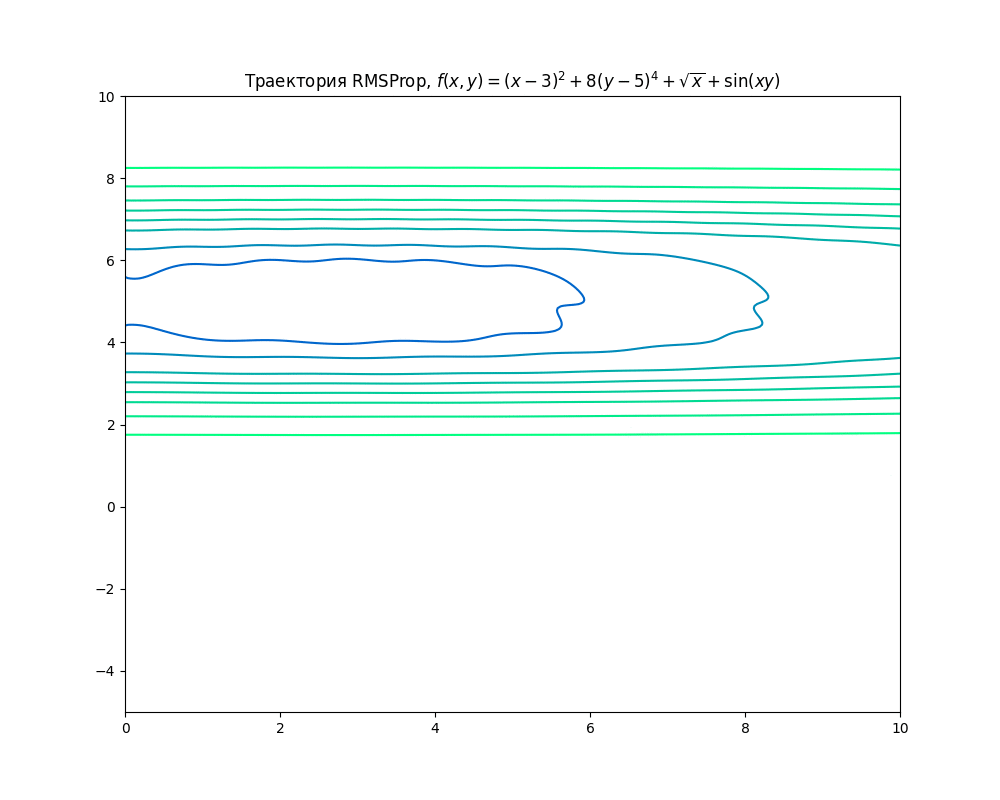

In [ ]:
rmsprop_trajectory = rmsprop(
    init_parameters=parameters.copy(),
    func_grad=func_grad,
    lr=0.1,
    n_iter=n_iter,
    eps=1e-6,
    mu=0.9
)
graph_title = 'Траектория RMSProp, ' + func_name
make_experiment(
    func,
    rmsprop_trajectory,
    graph_title,
    -5, 10, 0, 10
)
clear_output()
Image(open(f'saved_gifs/{graph_title}.gif','rb').read())

**Adam**

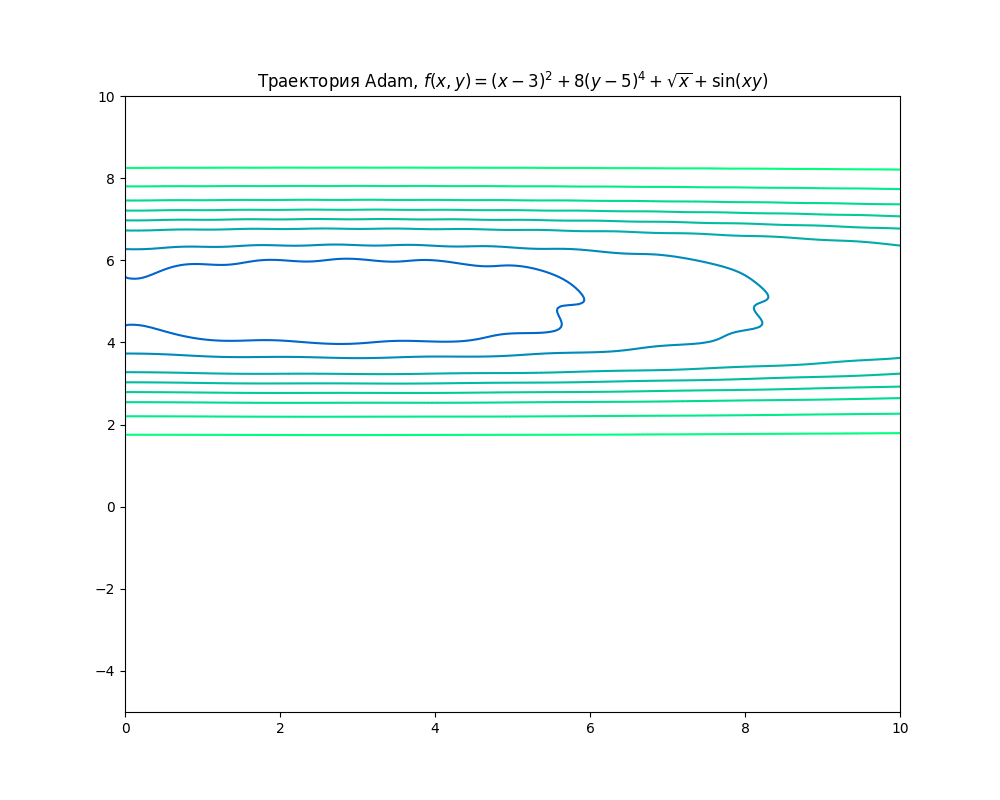

In [ ]:
adam_trajectory = adam(
    init_parameters=parameters.copy(),
    func_grad=func_grad,
    lr=0.1,
    n_iter=n_iter,
    eps=1e-6,
    mu=0.9,
    beta=0.9
)
graph_title = 'Траектория Adam, ' + func_name
make_experiment(
    func,
    adam_trajectory,
    graph_title,
    -5, 10, 0, 10
)
clear_output()
Image(open(f'saved_gifs/{graph_title}.gif','rb').read())

**Вывод**

SGD Работает, долгая сходимость на сложной функции

SGD + momentum сходится быстрее, но появилась проблема перескакивания минимума из-за большой скорости затухания ($\mu$)

AdaGrad затухание сходимости из-за неограниченного роста g, который находится в знаменателе

MRSProp Быстро сходится, не затухает. На гифке для сложного примера в конце есть какое-то странное колебание, что можно решить накапливанием градиента(то есть как сделано в adam)

Adam Ну просто супер